<a href="https://colab.research.google.com/github/Hamtori82/low_fertility_policy/blob/master/%EB%84%A4%EC%9D%B4%EB%B2%84%EB%89%B4%EC%8A%A4%EB%8C%93%EA%B8%80%ED%81%AC%EB%A1%A4%EB%A7%81_2020%EB%85%84%EA%B2%BD%EC%A0%9C%EC%A0%95%EC%B1%85%EB%B0%A9%ED%96%A5_%EC%A0%80%EC%B6%9C%EC%82%B0%EA%B7%B9%EB%B3%B5%EC%A0%95%EC%B1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ColabÏóê Mecab ÏÑ§Ïπò
# ÏΩîÎû©ÏóêÏÑú ÌïúÍ∏Ä ÌëúÍ∏∞Î•º ÏúÑÌï¥ Ìè∞Ìä∏ ÏÑ§Ïπò

In [ ]:
flag = True
while flag :
  !git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
  %cd Mecab-ko-for-Google-Colab
  !bash install_mecab-ko_on_colab190912.sh

  !apt-get update -qq
  !apt-get install fonts-nanum* -qq  
  flag = False

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 2.57 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 19.4 MB 1.6 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 453 kB 60.3 MB/s 
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-10-17 08:07:53--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket

# ÌÇ§ÏõåÎìú ÏûÖÎ†• ÌõÑ ÌÅ¨Î°§ÎßÅ

In [ ]:
from bs4 import BeautifulSoup
import requests
import re
import sys
import pprint
import csv
import json
import pandas as pd

result=[]

headers = {
    'authority': 'apis.naver.com',
    'accept': '*/*',
    'accept-language': 'ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'ab.storage.userId.7af503ae-0c84-478f-98b0-ecfff5d67750=%7B%22g%22%3A%22browser-1625985144309-6%22%2C%22c%22%3A1626101500089%2C%22l%22%3A1626101500089%7D; ab.storage.deviceId.7af503ae-0c84-478f-98b0-ecfff5d67750=%7B%22g%22%3A%224cbe130c-6edd-d4aa-a78d-290b003c3592%22%2C%22c%22%3A1626101500094%2C%22l%22%3A1626101500094%7D; ASID=7992e0220000017aaa36664e0000004e; _ga=GA1.2.612969395.1626832328; ab.storage.sessionId.7af503ae-0c84-478f-98b0-ecfff5d67750=%7B%22g%22%3A%2228148006-e01d-7623-b7d1-b4fff0f59b4e%22%2C%22e%22%3A1627919390179%2C%22c%22%3A1627908091281%2C%22l%22%3A1627917590179%7D; MM_NEW=1; NFS=2; NNB=RDIIILNX6JCWE; nx_ssl=2; nid_inf=1665554565; NID_AUT=tP3V5ox533EjyAgkJ1JaqWEnPOhXs2hr3teD39pK972fuXqDWQZXoIOMzICJpa1A; NID_JKL=d393brIzilbjw+7TVvG0OW6Eo22+WIhQAfihItUdgbY=; _naver_usersession_=SPdJTrlTMrn8Udkyn58eo6HL; NID_SES=AAABwJaKJ5FjUAETXL8SAX2HKMUSTt3l8pPu49OSzbGzgKEEMN/ckpP4DbQVHQwTV1hVPWtbpP7Nomg0CbD8TtCpyOYbeq8+OpHb5eWbDsXXCeLHO4epgthLtbQHiBE8spXqEtx/h0D6MzxsIlN4pa8gz51jV+oWzQQNnpQCeaKKLaxcpMfhGXnZv4BK1Rg+TAgUFE9RtExcKjteTL2hB9tKT41C7antdQdhLfVXWUbsJ/q5b62iDZnnZUAANXHnWp/9RI2YyKSn70SVu4Bag+fxA/23OqjCHSbK5RMiNOQKV+Bs7uugaAsMKkH6lGBBIbNDkTXGZ4n1+KbqFwe1kV9oCaPJ+siwXESEqvY0jaLVNAqUATQZjnIMFIYwARw41FTuduxW1IOF7MdP7R3EqOvnqNir2lXW1UfRlHlOtMC4w/tXk8xqJR/HVlZrnltKkMZB5zfyDNvnt02jbOKJcORjmOeVvL+xoCdSXwZclfJzRkC31l43+9jSu4X8RPUfuJILRMHf2e1A0NU7Mwds7h+S//5AD0yUJlPtFFzLvriuD1SMTRXiSwN4pNWBi6UIsPzScRpyLMc8hUE8Bi8jJtGk4e0=; NDARK=N; page_uid=hrKUflprvN8ssNc4Muwssssss3R-382317; BMR=',
    'referer': 'https://n.news.naver.com/article/028/0002595736',
    'sec-ch-ua': '"Whale";v="3", " Not;A Brand";v="99", "Chromium";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'script',
    'sec-fetch-mode': 'no-cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.108 Whale/3.15.136.18 Safari/537.36',
}

def news_url(query):
    page =1 
    url_list=[]
    while page <= 151 :

        ## 2022ÎÖÑ Í∏∞ÏÇ¨Îßå (2022.01.01 ~ 10.17)
        url = "https://m.search.naver.com/search.naver?where=m_news&sm=mtb_pge&query="+query+"&sort=0&photo=0&field=0&pd=3&ds=2022.01.01&de=2022.10.17&cluster_rank=24&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20220101to20221017&start="+str(page)   

        #url = "https://m.search.naver.com/search.naver?where=m_news&sm=tab_pge&query="+query+"&sort=0&photo=0&field=0&pd=1&ds=&de=&cluster_rank=129&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:1w,a:all&start="+str(page)
        response = requests.get(url,headers=headers)
        html = response.text

        #Î∑∞Ìã∞ÌíÄÏÜåÌîÑÏùò Ïù∏ÏûêÍ∞í ÏßÄÏ†ï
        soup = BeautifulSoup(html, "lxml")
        # print(soup.select('a.news_tit')[3]['href'])
        #<a>ÌÉúÍ∑∏ÏóêÏÑú Ï†úÎ™©Í≥º ÎßÅÌÅ¨Ï£ºÏÜå Ï∂îÏ∂ú
        atags = soup.select('.news_tit')
        #print(len(atags))
        for i in atags:
            if "https://n.news.naver.com/" in i['href'] :
                url_list.append(i['href'])   #ÎßÅÌÅ¨Ï£ºÏÜå
                #print(i['href'])
        if len(atags) < 15 : #ÌïúÌéòÏù¥ÏßÄÏóê 15Í∞úÎÇòÏò§ÎäîÎç∞, Í∑∏Î≥¥Îã§ ÏûëÏúºÎ©¥ ÏóÜÎã§Í≥† ÌåêÎã®
            break
        page = page + 15
    return url_list
    # ÏúÑÏóêÏÑú ÌÅ¨Î°§ÎßÅÌïú ÎÑ§Ïù¥Î≤Ñ Îâ¥Ïä§ urlÏùÑ ÏûÖÎ†•Ìï©ÎãàÎã§.

def comment(url_list):
    total_comment = [] #Î™®Îì† ÎåìÍ∏ÄÏùÑ Îã¥Îäî Î¶¨Ïä§Ìä∏
    for url_ex in url_list:
        url = url_ex
        url = url.split('?')[0]
        oid_1 = url.split('/')[-1]
        oid_2 = url.split('/')[-2]
        i = 1
        # df = pd.DataFrame(columns=['ÎåìÍ∏Ä'])

        while True:
            params = {
                'ticket': 'news',
                'templateId': 'default_society',
                'pool': 'cbox5',
                'lang': 'ko',
                'country': 'KR',
                'objectId': f'news{oid_2},{oid_1}',
                'pageSize': '100',
                'indexSize': '10',
                'page': str(i),
                'currentPage': '0',
                'moreParam.direction': 'next',
                'moreParam.prev': '10000o90000op06guicil48ars',
                'moreParam.next': '1000050000305guog893h1re',
                'followSize': '100',
                'includeAllStatus': 'true',
            }

            response = requests.get('https://apis.naver.com/commentBox/cbox/web_naver_list_jsonp.json', params=params, headers=headers)
            response.encoding = "UTF-8-sig"
            res = response.text.replace("_callback(","")[:-2]
            temp=json.loads(res) 
            # print(temp)
            try : 
                comment = list(pd.DataFrame(temp['result']['commentList'])['contents'])
                for j in range(len(comment)):
                    total_comment.append(comment[j])
                if len(comment)<97: 
                    break 
                else: 
                    i+=1
            except :
                break    

    print(total_comment)
    return total_comment



In [ ]:
# # Ïã§ÌñâÌï®Ïàò
def main():
    query = input("Í≤ÄÏÉâÏñ¥ ÏûÖÎ†• : ")  
    # query= [ÏòÅÏïÑÏàòÎãπ ÏßÄÍ∏â, Ï≤´ÎßåÎÇ® Íæ∏Îü¨ÎØ∏ ÎèÑÏûÖ, Î∂ÄÎ∂ÄÏú°ÏïÑ Ìú¥ÏßÅ ÌôúÏÑ±Ìôî, Í≥µÎ≥¥Ïú° ÌôïÏ∂©, Îã§ÏûêÎÖÄ ÏßÄÏõê ÌôïÎåÄ]
    url_list = news_url(query)  
    allCommetns = comment(url_list)

query = input("Í≤ÄÏÉâÏñ¥ ÏûÖÎ†• : ")  
url_list = news_url(query)  
allCommetns = comment(url_list)

Í≤ÄÏÉâÏñ¥ ÏûÖÎ†• : Í≥µÎ≥¥Ïú° ÌôïÏ∂©
['Ï≤úÏïàÏãú ÌôîÏù¥ÌåÖÏûÖÎãàÎã§!', 'ÎπÑÌåêÎßå ÏûàÍ≥† ÎåÄÏïàÏùÄ ÏóÜÎäî Îú¨Íµ¨Î¶Ñ Ïû°Îäî Í∏∞ÏÇ¨', 'ÏßÄÍ∏à Ï†ïÏπòÏ†ÅÏù∏ ÎπÑÌåêÏùÑ Ìï† Ïó¨Ïú†Í∞Ä ÏûàÎäî Ï§Ñ ÏïÑÏãúÏò§? ÏßÄÎÇú 5ÎÖÑÍ∞Ñ Ïù∏Íµ¨Í∞êÏÜåÎïåÎ¨∏Ïóê Ïì¥ ÎèàÏù¥ ÏñºÎßåÎç∞ ÏßÄÍ∏à ÎÇòÏïÑÏßÑ Í≤å ÌïòÎÇòÎùºÎèÑ ÏûàÏÜå?.  Í∑∏Îü¨Îãà Íµ≥Ïù¥ Ïó≠Ï£ºÌñâ Ïù¥ÎûÑ Í≤ÉÎèÑ ÏóÜÎã® ÎßêÏù¥Ïò§.  Ïù∏Íµ¨ Í∞êÏÜåÎäî ÏÉùÏ°¥Ïùò Î¨∏Ï†úÏù∏Îç∞ ÏïÑÏßÅÎèÑ ÎπÑÌåêÎßå ÌïòÍ≥† ÏûàÎã§ÎäîÍ≤å ÌïúÏã¨ÌïòÏò§.   Ï†ÑÎ¨∏Í∞ÄÎì§ÎèÑ Ìï¥Î≤ïÏùÑ Î™ªÏ∞æÍ≥† ÏûàÍ≥† ÎÖºÏÑ§ÏùòÏõê ÎãπÏã† Î®∏Î¶¨ÏóêÎèÑ ÎåÄÏïàÏù¥ ÏóÜÎäî Í≤É Îã§ ÏïÑÎãàÍπå Ìï®Î∂ÄÎ°ú ÏûÖÎÜÄÎ¶¨ÏßÄ ÎßàÏãúÏò§.', 'Ïó¨Í∞ÄÎ∂ÄÏóêÏÑú Ïì∏Î™®ÏóÜÎäî Í≥≥Ïóê Îèà Ïì∞ÎäîÍ≤ÉÏ≤òÎüº Íµ≠Í∞ÄÏóê ÎßàÏù¥ÎÑàÏä§ÎêòÎäî ÏùºÏùÄÏóÜÎã§\n\nÍµ≠Í∞Ä ÏÑ∏Í∏àÏúºÎ°ú Ïö¥ÏòÅÎêòÎäî ÎÇ®ÌòêÍ∏∞Í¥ÄÏù¥ ÏûàÎã§ÎäîÍ±¥ ÎπÑÏ†ïÏÉÅÏ†ÅÏù¥Îã§ \n\nÍ±ç ÌèêÏßÄÍ∞Ä ÎãµÏù¥Î©∞ Í∑∏Í≤å ÏãúÎåÄÏ†ïÏã†Ïù¥Îã§ ÎØºÏ£ºÏ£ºÏùò ÏÇ¨ÌöåÏóêÏÑú Ïôú ÏÑ±ÌäπÍ∂åÏùÑ ÎÇ¥Î†§ÎÜìÏßÄ Î™ªÌïòÎÇò?', 'Ïï†Îäî ÏßÑÏßú Ïì∞Î†àÍ∏∞ÎÑ§. Ï†àÎùºÎèÑÎÉê?  Ïó¨ÏßÄÍªè Ï†ÄÏ∂úÏÇ∞ Î¨∏Ï†ú Ïã≠Ïó¨ÎÖÑÏ†ÑÎ∂ÄÌÑ∞Ïù

In [ ]:
# Í∑∏ ÌõÑ Î∂ÑÏÑùÏùÑ ÏúÑÌïú Í∞ÅÏ¢Ö ÎùºÏù¥Î∏åÎü¨Î¶¨ÏÇΩÏûÖ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# ÎßåÎì† Î¶¨Ïä§Ìä∏Î•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú ÎßåÎì§Ïñ¥ÏÑú Î∂ÑÏÑùÌï¥ÏïºÌï®.
cols_name = ["reply"]
total_data = pd.DataFrame(allCommetns,columns=cols_name)

print(len(total_data))
total_data[:5]

98


reply
0                                        Ï≤úÏïàÏãú ÌôîÏù¥ÌåÖÏûÖÎãàÎã§!
1                            ÎπÑÌåêÎßå ÏûàÍ≥† ÎåÄÏïàÏùÄ ÏóÜÎäî Îú¨Íµ¨Î¶Ñ Ïû°Îäî Í∏∞ÏÇ¨
2  ÏßÄÍ∏à Ï†ïÏπòÏ†ÅÏù∏ ÎπÑÌåêÏùÑ Ìï† Ïó¨Ïú†Í∞Ä ÏûàÎäî Ï§Ñ ÏïÑÏãúÏò§? ÏßÄÎÇú 5ÎÖÑÍ∞Ñ Ïù∏Íµ¨Í∞êÏÜåÎïåÎ¨∏Ïóê Ïì¥ Îèà...
3  Ïó¨Í∞ÄÎ∂ÄÏóêÏÑú Ïì∏Î™®ÏóÜÎäî Í≥≥Ïóê Îèà Ïì∞ÎäîÍ≤ÉÏ≤òÎüº Íµ≠Í∞ÄÏóê ÎßàÏù¥ÎÑàÏä§ÎêòÎäî ÏùºÏùÄÏóÜÎã§\n\nÍµ≠Í∞Ä ÏÑ∏Í∏à...
4  Ïï†Îäî ÏßÑÏßú Ïì∞Î†àÍ∏∞ÎÑ§. Ï†àÎùºÎèÑÎÉê?  Ïó¨ÏßÄÍªè Ï†ÄÏ∂úÏÇ∞ Î¨∏Ï†ú Ïã≠Ïó¨ÎÖÑÏ†ÑÎ∂ÄÌÑ∞Ïù∏Îç∞ Ïó¨Í∞ÄÎ∂ÄÏûàÏñ¥ÏÑú ...

## 2) Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú

In [ ]:
# Ï§ëÎ≥µÌôïÏù∏
total_data['reply'].nunique()

76

In [ ]:
# reviews Ïó¥ÏóêÏÑú Ï§ëÎ≥µÏù∏ ÎÇ¥Ïö©Ïù¥ ÏûàÎã§Î©¥ Ï§ëÎ≥µ Ï†úÍ±∞
total_data.drop_duplicates(subset=['reply'], inplace=True) 
print('Ï¥ù ÏÉòÌîåÏùò Ïàò :',len(total_data))

Ï¥ù ÏÉòÌîåÏùò Ïàò : 76


In [ ]:
# nullÍ∞í Ïú†Î¨¥ ÌååÏïÖ
print(total_data.isnull().values.any())

False


In [ ]:
#Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú
#Ï†ïÍ∑ú ÌëúÌòÑÏ†úÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌïúÍ∏ÄÏùÑ Ï†úÏô∏ÌïòÍ≥† Î™®Îëê Ï†úÍ±∞Ìï¥Ï§çÎãàÎã§. ÎòêÌïú ÌòπÏãú Ïù¥ Í≥ºÏ†ïÏóêÏÑú Îπà ÏÉòÌîåÏù¥ ÏÉùÍ∏∞ÏßÄÎäî ÏïäÎäîÏßÄ ÌôïÏù∏
# ÌïúÍ∏ÄÍ≥º Í≥µÎ∞±ÏùÑ Ï†úÏô∏ÌïòÍ≥† Î™®Îëê Ï†úÍ±∞
total_data['reply'] = total_data['reply'].str.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]","")
total_data['reply'].replace('', np.nan, inplace=True)# Í≥µÎ∞±Null Í∞í Ï†úÍ±∞
total_data = total_data.dropna(how='any') # Null Í∞í Ï†úÍ±∞
print(total_data.isnull().sum())

reply    0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
# ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞ mecab /Î∞±ÏûÑÏùò ÌÜ†ÌÅ∞Ìôî ÌÖåÏä§Ìä∏
from konlpy.tag import Okt
mecab = Mecab()
okt = Okt()
print(okt.morphs('Î®ºÏÜåÎ¶¨Ïïº.. Îñ®Ïñ¥ÏßÄÎ©¥ Î¨ºÌÉÄÏïºÏßÄ... 10% ÌåîÍ≥† Îñ®Ïñ¥ÏßÄÎ©¥ Í∞úÏù¥Îìù'))

['Î®º', 'ÏÜåÎ¶¨', 'Ïïº', '..', 'Îñ®Ïñ¥ÏßÄÎ©¥', 'Î¨º', 'ÌÉÄÏïºÏßÄ', '...', '10%', 'ÌåîÍ≥†', 'Îñ®Ïñ¥ÏßÄÎ©¥', 'Í∞úÏù¥Îìù']


In [ ]:
#Î∂àÏö©Ïñ¥ Ï†úÍ±∞
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Î∂àÏö©Ïñ¥Î•º ÏßÄÏ†ïÌïòÏó¨ ÌïÑÏöîÏóÜÎäî ÌÜ†ÌÅ∞Îì§ÏùÄ Ï†úÍ±∞
# stopwords = ['ÎèÑ', 'Îäî', 'Îã§', 'Ïùò', 'Í∞Ä', 'Ïù¥', 'ÏùÄ', 'Ìïú', 'Ïóê', 'Ìïò', 'Í≥†', 'ÏùÑ', 'Î•º', 'Ïù∏', 'ÎìØ', 'Í≥º', 'ÏôÄ', 'ÎÑ§', 'Îì§', 'ÎìØ','Ìï†','ÎÉê','Ïàò','ÏïÑ','Í∑∏','Ìñà','Ïñ¥','Í∏∞','Îßå', 'Î™ª','ÏßÄ', 'ÏûÑ', 'Í≤å','Ïûà','Í±∞','Î©¥','ÏóÜ','ÏúºÎ°ú','ÎÇò','Í≤É','Î°ú','ÎäîÎç∞','Ïïà','Îêò','ÏóêÏÑú','Í≤†']
stopwords = 'ÎèÑ Îäî ÏùÄ Î©¥ÏÑú Î≥¥Îã§ ÎêúÎã§ Îã§ Î∞õ ÎΩë Í∞ú ÏÇ¥ Ìï©ÎãàÎã§ Îç∞ Ïù¥Í≤å Ï¢ã Ïïû Ìï® Î®π Í∏¥ Ïû° ÎÇ® ÎÜà ÎïåÎ¨∏ Î™®Î•¥ Î≤ÑÎ¶¨ ÎäîÏßÄ Ïßì ÎùºÎèÑ Îßû Ïùå Ïïò Îê® ÏùÄÎç∞ ÌÖêÎç∞ ÏïÑÏÑú ÏïÑÎùº Îßà Ïì∞ Í±∏ ÎùºÎäî ÎãàÍπå Ïñ¥ÏÑú ÎÇòÏò§ Îã§Îäî Î≤à Ïò® Îã§Îäî Ïùò  Í∞Ä  Ïù¥ Ìïú  Ïóê  Ìïò  Í≥† „Öã„Öã„Öã „Öã „Öã„Öã ÏùÑ  Î•º  Ïù∏ Ïúº ÎìØ  Í≥º  ÏôÄ  ÎÑ§  Îì§  ÎìØ Ìï† ÎÉê Ïàò ÏïÑ Í∑∏ Ìñà Ïñ¥ Í∏∞ Îßå Ïù∏Îç∞ Ìï¥ Ìï¥ÏÑú Îçî Îßê Í∑∏ÎÉ• Ïóà Î™ª ÏßÄ  ÏûÑ Ïïä Îãà Ï£º Î≥¥ ÏÑú ÎùºÍ≥† ÌïúÎã§ Î≠ê ÎåÄ ÏúºÎ©¥ Ìï¥Ïïº Í±¥ Îì† Îëê Í∞ô ÎÑ§Ïöî Îã§Í≥† Îêú Ïπò Ïù¥ÎÇò ÎÇ¥ ÌïúÌÖå Í≤å Ïûà Í±∞ Î©¥ ÏóÜ ÏúºÎ°ú ÎÇò Í≤É Î°ú ÎäîÎç∞ Ïïà Îêò ÏóêÏÑú Í≤† ÏïÑ ÏïÑÏù¥Íµ¨ ÏïÑÏù¥Ïø† ÏïÑÏù¥Í≥† Ïñ¥ ÎÇò Ïö∞Î¶¨ Ï†ÄÌù¨ Îî∞Îùº ÏùòÌï¥ ÏùÑ Î•º Ïóê Ïùò Í∞Ä ÏúºÎ°ú Î°ú ÏóêÍ≤å ÎøêÏù¥Îã§ ÏùòÍ±∞ÌïòÏó¨ Í∑ºÍ±∞ÌïòÏó¨ ÏûÖÍ∞ÅÌïòÏó¨ Í∏∞Ï§ÄÏúºÎ°ú ÏòàÌïòÎ©¥ ÏòàÎ•º Îì§Î©¥ ÏòàÎ•º Îì§ÏûêÎ©¥ Ï†Ä ÏÜåÏù∏ ÏÜåÏÉù Ï†ÄÌù¨ ÏßÄÎßêÍ≥† ÌïòÏßÄÎßà ÌïòÏßÄÎßàÎùº Îã§Î•∏ Î¨ºÎ°† ÎòêÌïú Í∑∏Î¶¨Í≥† ÎπÑÍ∏∏Ïàò ÏóÜÎã§ Ìï¥ÏÑúÎäî ÏïàÎêúÎã§ ÎøêÎßå ÏïÑÎãàÎùº ÎßåÏù¥ ÏïÑÎãàÎã§ ÎßåÏùÄ ÏïÑÎãàÎã§ ÎßâÎ°†ÌïòÍ≥† Í¥ÄÍ≥ÑÏóÜÏù¥ Í∑∏ÏπòÏßÄ ÏïäÎã§ Í∑∏Îü¨ÎÇò Í∑∏Îü∞Îç∞ ÌïòÏßÄÎßå Îì†Í∞ÑÏóê ÎÖºÌïòÏßÄ ÏïäÎã§ Îî∞ÏßÄÏßÄ ÏïäÎã§ ÏÑ§ÏÇ¨ ÎπÑÎ°ù ÎçîÎùºÎèÑ ÏïÑÎãàÎ©¥ Îßå Î™ªÌïòÎã§ ÌïòÎäî Ìé∏Ïù¥ ÎÇ´Îã§ Î∂àÎ¨∏ÌïòÍ≥† Ìñ•ÌïòÏó¨ Ìñ•Ìï¥ÏÑú Ìñ•ÌïòÎã§ Ï™ΩÏúºÎ°ú ÌãàÌÉÄ Ïù¥Ïö©ÌïòÏó¨ ÌÉÄÎã§ Ïò§Î•¥Îã§ Ï†úÏô∏ÌïòÍ≥† Ïù¥ Ïô∏Ïóê Ïù¥ Î∞ñÏóê ÌïòÏó¨Ïïº ÎπÑÎ°úÏÜå ÌïúÎã§Î©¥ Î™∞ÎùºÎèÑ Ïô∏ÏóêÎèÑ Ïù¥Í≥≥ Ïó¨Í∏∞ Î∂ÄÌÑ∞ Í∏∞Ï†êÏúºÎ°ú Îî∞ÎùºÏÑú Ìï† ÏÉùÍ∞ÅÏù¥Îã§ ÌïòÎ†§Í≥†ÌïòÎã§ Ïù¥Î¶¨ÌïòÏó¨ Í∑∏Î¶¨ÌïòÏó¨ Í∑∏Î†áÍ≤å Ìï®ÏúºÎ°úÏç® ÌïòÏßÄÎßå ÏùºÎïå Ìï†Îïå ÏïûÏóêÏÑú Ï§ëÏóêÏÑú Î≥¥ÎäîÎç∞ÏÑú ÏúºÎ°úÏç® Î°úÏç® ÍπåÏßÄ Ìï¥ÏïºÌïúÎã§ ÏùºÍ≤ÉÏù¥Îã§ Î∞òÎìúÏãú Ìï†Ï§ÑÏïåÎã§ Ìï†ÏàòÏûàÎã§ Ìï†ÏàòÏûàÏñ¥ ÏûÑÏóê ÌãÄÎ¶ºÏóÜÎã§ ÌïúÎã§Î©¥ Îì± Îì±Îì± Ï†ú Í≤®Ïö∞ Îã®ÏßÄ Îã§Îßå Ìï†Îøê Îî©Îèô ÎåïÍ∑∏ ÎåÄÌï¥ÏÑú ÎåÄÌïòÏó¨ ÎåÄÌïòÎ©¥ Ìõ®Ïî¨ ÏñºÎßàÎÇò ÏñºÎßàÎßåÌÅº ÏñºÎßàÌÅº ÎÇ®Ïßì Ïó¨ ÏñºÎßàÍ∞Ñ ÏïΩÍ∞Ñ Îã§ÏÜå Ï¢Ä Ï°∞Í∏à Îã§Ïàò Î™á ÏñºÎßà ÏßÄÎßå ÌïòÎ¨ºÎ©∞ ÎòêÌïú Í∑∏Îü¨ÎÇò Í∑∏Î†áÏßÄÎßå ÌïòÏßÄÎßå Ïù¥Ïô∏ÏóêÎèÑ ÎåÄÌï¥ ÎßêÌïòÏûêÎ©¥ ÎøêÏù¥Îã§ Îã§ÏùåÏóê Î∞òÎåÄÎ°ú Î∞òÎåÄÎ°ú ÎßêÌïòÏûêÎ©¥ Ïù¥ÏôÄ Î∞òÎåÄÎ°ú Î∞îÍæ∏Ïñ¥ÏÑú ÎßêÌïòÎ©¥ Î∞îÍæ∏Ïñ¥ÏÑú ÌïúÎã§Î©¥ ÎßåÏïΩ Í∑∏Î†áÏßÄÏïäÏúºÎ©¥ ÍπåÏïÖ Ìà≠ Îî± ÏÇêÍ±±Í±∞Î¶¨Îã§ Î≥¥ÎìúÎìù ÎπÑÍ±±Í±∞Î¶¨Îã§ ÍΩàÎãπ ÏùëÎãπ Ìï¥ÏïºÌïúÎã§ Ïóê Í∞ÄÏÑú Í∞Å Í∞ÅÍ∞Å Ïó¨Îü¨Î∂Ñ Í∞ÅÏ¢Ö Í∞ÅÏûê Ï†úÍ∞ÅÍ∏∞ ÌïòÎèÑÎ°ùÌïòÎã§ ÏôÄ Í≥º Í∑∏Îü¨ÎØÄÎ°ú Í∑∏ÎûòÏÑú Í≥†Î°ú Ìïú ÍπåÎã≠Ïóê ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Í±∞ÎãàÏôÄ Ïù¥ÏßÄÎßå ÎåÄÌïòÏó¨ Í¥ÄÌïòÏó¨ Í¥ÄÌïú Í≥ºÏó∞ Ïã§Î°ú ÏïÑÎãàÎÇòÎã§Î•ºÍ∞Ä ÏÉùÍ∞ÅÌïúÎåÄÎ°ú ÏßÑÏßúÎ°ú ÌïúÏ†ÅÏù¥ÏûàÎã§ ÌïòÍ≥§ÌïòÏòÄÎã§ Ìïò ÌïòÌïò ÌóàÌóà ÏïÑÌïò Í±∞Î∞î ÏôÄ Ïò§ Ïôú Ïñ¥Ïß∏ÏÑú Î¨¥ÏóáÎïåÎ¨∏Ïóê Ïñ¥Ï∞å ÌïòÍ≤†ÎäîÍ∞Ä Î¨¥Ïä® Ïñ¥Îîî Ïñ¥ÎäêÍ≥≥ ÎçîÍµ∞Îã§ÎÇò ÌïòÎ¨ºÎ©∞ ÎçîÏö±Ïù¥Îäî Ïñ¥ÎäêÎïå Ïñ∏Ï†ú Ïïº Ïù¥Î¥ê Ïñ¥Ïù¥ Ïó¨Î≥¥ÏãúÏò§ ÌùêÌùê Ìù• Ìú¥ ÌóâÌóâ ÌóêÎñ°ÌóêÎñ° ÏòÅÏ∞® Ïó¨Ï∞® Ïñ¥Í∏∞Ïó¨Ï∞® ÎÅôÎÅô ÏïÑÏïº Ïïó ÏïÑÏïº ÏΩ∏ÏΩ∏ Ï°∏Ï°∏ Ï¢çÏ¢ç ÎöùÎöù Ï£ºÎ£©Ï£ºÎ£© ÏÜ® Ïö∞Î•¥Î•¥ Í∑∏ÎûòÎèÑ Îòê Í∑∏Î¶¨Í≥† Î∞îÍæ∏Ïñ¥ÎßêÌïòÎ©¥ Î∞îÍæ∏Ïñ¥ÎßêÌïòÏûêÎ©¥ ÌòπÏùÄ ÌòπÏãú ÎãµÎã§ Î∞è Í∑∏Ïóê Îî∞Î•¥Îäî ÎïåÍ∞Ä ÎêòÏñ¥ Ï¶â ÏßÄÎì†ÏßÄ ÏÑ§Î†π Í∞ÄÎ†π ÌïòÎçîÎùºÎèÑ Ìï†ÏßÄÎùºÎèÑ ÏùºÏßÄÎùºÎèÑ ÏßÄÎì†ÏßÄ Î™á Í±∞Ïùò ÌïòÎßàÌÑ∞Î©¥ Ïù∏Ï†† Ïù¥Ï†† ÎêúÎ∞îÏóêÏïº ÎêúÏù¥ÏÉÅ ÎßåÌÅº	Ïñ¥Ï∞åÎêèÎì† Í∑∏ÏúÑÏóê Í≤åÎã§Í∞Ä Ï†êÏóêÏÑú Î≥¥ÏïÑ ÎπÑÏ∂îÏñ¥ Î≥¥ÏïÑ Í≥†Î†§ÌïòÎ©¥ ÌïòÍ≤åÎê†Í≤ÉÏù¥Îã§ ÏùºÍ≤ÉÏù¥Îã§ ÎπÑÍµêÏ†Å Ï¢Ä Î≥¥Îã§Îçî ÎπÑÌïòÎ©¥ ÏãúÌÇ§Îã§ ÌïòÍ≤åÌïòÎã§ Ìï†ÎßåÌïòÎã§ ÏùòÌï¥ÏÑú Ïó∞Ïù¥ÏÑú Ïù¥Ïñ¥ÏÑú ÏûáÎî∞Îùº Îí§Îî∞Îùº Îí§Ïù¥Ïñ¥ Í≤∞Íµ≠ ÏùòÏßÄÌïòÏó¨ Í∏∞ÎåÄÏó¨ ÌÜµÌïòÏó¨ ÏûêÎßàÏûê ÎçîÏö±Îçî Î∂àÍµ¨ÌïòÍ≥† ÏñºÎßàÎì†ÏßÄ ÎßàÏùåÎåÄÎ°ú Ï£ºÏ†ÄÌïòÏßÄ ÏïäÍ≥† Í≥ß Ï¶âÏãú Î∞îÎ°ú ÎãπÏû• ÌïòÏûêÎßàÏûê Î∞ñÏóê ÏïàÎêúÎã§ ÌïòÎ©¥ÎêúÎã§ Í∑∏Îûò Í∑∏Î†áÏßÄ ÏöîÏª®ÎåÄ Îã§Ïãú ÎßêÌïòÏûêÎ©¥ Î∞îÍøî ÎßêÌïòÎ©¥ Ï¶â Íµ¨Ï≤¥Ï†ÅÏúºÎ°ú ÎßêÌïòÏûêÎ©¥ ÏãúÏûëÌïòÏó¨ ÏãúÏ¥àÏóê Ïù¥ÏÉÅ Ìóà Ìóâ ÌóàÍ±± Î∞îÏôÄÍ∞ôÏù¥ Ìï¥ÎèÑÏ¢ãÎã§ Ìï¥ÎèÑÎêúÎã§ Í≤åÎã§Í∞Ä ÎçîÍµ¨ÎÇò ÌïòÎ¨ºÎ©∞ ÏôÄÎ•¥Î•¥ Ìåç ÌçΩ ÌéÑÎ†Å ÎèôÏïà Ïù¥Îûò ÌïòÍ≥†ÏûàÏóàÎã§ Ïù¥ÏóàÎã§ ÏóêÏÑú Î°úÎ∂ÄÌÑ∞ ÍπåÏßÄ ÏòàÌïòÎ©¥ ÌñàÏñ¥Ïöî Ìï¥Ïöî Ìï®Íªò Í∞ôÏù¥ ÎçîÎ∂àÏñ¥ ÎßàÏ†Ä ÎßàÏ†ÄÎèÑ ÏñëÏûê Î™®Îëê ÏäµÎãàÎã§ Í∞ÄÍπåÏä§Î°ú ÌïòÎ†§Í≥†ÌïòÎã§ Ï¶àÏùåÌïòÏó¨ Îã§Î•∏ Îã§Î•∏ Î∞©Î©¥ÏúºÎ°ú Ìï¥Î¥êÏöî ÏäµÎãàÍπå ÌñàÏñ¥Ïöî ÎßêÌï†Í≤ÉÎèÑ ÏóÜÍ≥† Î¨¥Î¶éÏì∞Í≥† Í∞úÏùòÏπòÏïäÍ≥† ÌïòÎäîÍ≤ÉÎßå Î™ªÌïòÎã§ ÌïòÎäîÍ≤ÉÏù¥ ÎÇ´Îã§ Îß§ Îß§Î≤à Îì§ Î™® Ïñ¥ÎäêÍ≤É Ïñ¥Îäê Î°úÏç® Í∞ñÍ≥†ÎßêÌïòÏûêÎ©¥ Ïñ¥Îîî Ïñ¥ÎäêÏ™Ω Ïñ¥ÎäêÍ≤É Ïñ¥ÎäêÌï¥ Ïñ¥Îäê ÎÖÑÎèÑ Îùº Ìï¥ÎèÑ Ïñ∏Ï††Í∞Ä Ïñ¥Îñ§Í≤É Ïñ¥ÎäêÍ≤É Ï†ÄÍ∏∞ Ï†ÄÏ™Ω Ï†ÄÍ≤É Í∑∏Îïå Í∑∏Îüº Í∑∏Îü¨Î©¥ ÏöîÎßåÌïúÍ±∏ Í∑∏Îûò Í∑∏Îïå Ï†ÄÍ≤ÉÎßåÌÅº Í∑∏Ï†Ä Ïù¥Î•¥Í∏∞ÍπåÏßÄ Ìï† Ï§Ñ ÏïàÎã§ Ìï† ÌûòÏù¥ ÏûàÎã§ ÎÑà ÎÑàÌù¨ ÎãπÏã† Ïñ¥Ï∞å ÏÑ§Îßà Ï∞®ÎùºÎ¶¨ Ìï†ÏßÄÏñ∏Ï†ï Ìï†ÏßÄÎùºÎèÑ Ìï†ÎßùÏ†ï Ìï†ÏßÄÏñ∏Ï†ï Íµ¨ÌÜ†ÌïòÎã§ Í≤åÏö∞Îã§ ÌÜ†ÌïòÎã§ Î©îÏì∞Í≤ÅÎã§ ÏòÜÏÇ¨Îûå Ìâ§ Ï≥á ÏùòÍ±∞ÌïòÏó¨ Í∑ºÍ±∞ÌïòÏó¨ ÏùòÌï¥ Îî∞Îùº ÌûòÏûÖÏñ¥ Í∑∏ Îã§Ïùå Î≤ÑÍ∏à ÎëêÎ≤àÏß∏Î°ú Í∏∞ÌÉÄ Ï≤´Î≤àÏß∏Î°ú ÎÇòÎ®∏ÏßÄÎäî Í∑∏Ï§ëÏóêÏÑú Í≤¨ÏßÄÏóêÏÑú ÌòïÏãùÏúºÎ°ú Ïì∞Ïó¨ ÏûÖÏû•ÏóêÏÑú ÏúÑÌï¥ÏÑú Îã®ÏßÄ ÏùòÌï¥ÎêòÎã§ ÌïòÎèÑÎ°ùÏãúÌÇ§Îã§ ÎøêÎßåÏïÑÎãàÎùº Î∞òÎåÄÎ°ú Ï†ÑÌõÑ Ï†ÑÏûê ÏïûÏùòÍ≤É Ïû†Ïãú Ïû†Íπê ÌïòÎ©¥ÏÑú Í∑∏Î†áÏßÄÎßå Îã§ÏùåÏóê Í∑∏Îü¨ÌïúÏ¶â Í∑∏Îü∞Ï¶â ÎÇ®Îì§ ÏïÑÎ¨¥Í±∞ÎÇò Ïñ¥Ï∞åÌïòÎì†ÏßÄ Í∞ôÎã§ ÎπÑÏä∑ÌïòÎã§ ÏòàÏª®ÎåÄ Ïù¥Îü¥Ï†ïÎèÑÎ°ú Ïñ¥ÎñªÍ≤å ÎßåÏïΩ ÎßåÏùº ÏúÑÏóêÏÑú ÏÑúÏà†ÌïúÎ∞îÏôÄÍ∞ôÏù¥ Ïù∏ ÎìØÌïòÎã§ ÌïòÏßÄ ÏïäÎäîÎã§Î©¥ ÎßåÏïΩÏóê Î¨¥Ïóá Î¨¥Ïä® Ïñ¥Îäê Ïñ¥Îñ§ ÏïÑÎûòÏúó Ï°∞Ï∞® ÌïúÎç∞ Í∑∏ÎüºÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† Ïó¨Ï†ÑÌûà Ïã¨ÏßÄÏñ¥ ÍπåÏßÄÎèÑ Ï°∞Ï∞®ÎèÑ ÌïòÏßÄ ÏïäÎèÑÎ°ù ÏïäÍ∏∞ ÏúÑÌïòÏó¨ Îïå ÏãúÍ∞Å Î¨¥Î†µ ÏãúÍ∞Ñ ÎèôÏïà Ïñ¥Îïå Ïñ¥Îñ†Ìïú ÌïòÏó¨Í∏à ÎÑ§ Ïòà Ïö∞ÏÑ† ÎàÑÍµ¨ ÎàÑÍ∞Ä ÏïåÍ≤†ÎäîÍ∞Ä ÏïÑÎ¨¥ÎèÑ Ï§ÑÏùÄÎ™®Î•∏Îã§ Ï§ÑÏùÄ Î™∞ÎûèÎã§ ÌïòÎäî ÍπÄÏóê Í≤∏ÏÇ¨Í≤∏ÏÇ¨ ÌïòÎäîÎ∞î Í∑∏Îü∞ ÍπåÎã≠Ïóê Ìïú Ïù¥Ïú†Îäî Í∑∏Îü¨Îãà Í∑∏Îü¨ÎãàÍπå ÎïåÎ¨∏Ïóê Í∑∏ ÎÑàÌù¨ Í∑∏Îì§ ÎÑàÌù¨Îì§ ÌÉÄÏù∏ Í≤É Í≤ÉÎì§ ÎÑà ÏúÑÌïòÏó¨ Í≥µÎèôÏúºÎ°ú ÎèôÏãúÏóê ÌïòÍ∏∞ ÏúÑÌïòÏó¨ Ïñ¥Ï∞åÌïòÏó¨ Î¨¥ÏóáÎïåÎ¨∏Ïóê Î∂ïÎ∂ï ÏúôÏúô ÎÇò Ïö∞Î¶¨ ÏóâÏóâ ÌúòÏùµ ÏúôÏúô Ïò§Ìò∏ ÏïÑÌïò Ïñ¥Ï®ãÎì† Îßå Î™ªÌïòÎã§	ÌïòÍ∏∞Î≥¥Îã§Îäî Ï∞®ÎùºÎ¶¨ ÌïòÎäî Ìé∏Ïù¥ ÎÇ´Îã§ ÌùêÌùê ÎÜÄÎùºÎã§ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎßêÌïòÏûêÎ©¥ ÎßàÏπò ÏïÑÎãàÎùºÎ©¥ Ïâø Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥ Í∑∏Î†áÏßÄ ÏïäÎã§Î©¥ Ïïà Í∑∏Îü¨Î©¥ ÏïÑÎãàÏóàÎã§Î©¥ ÌïòÎì†ÏßÄ ÏïÑÎãàÎ©¥ Ïù¥ÎùºÎ©¥ Ï¢ãÏïÑ ÏïåÏïòÏñ¥ ÌïòÎäîÍ≤ÉÎèÑ Í∑∏ÎßåÏù¥Îã§ Ïñ¥Ï©îÏàò ÏóÜÎã§ ÌïòÎÇò Ïùº ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏùºÎã® ÌïúÏº†ÏúºÎ°úÎäî Ïò§ÏûêÎßàÏûê Ïù¥Î†áÍ≤åÎêòÎ©¥ Ïù¥ÏôÄÍ∞ôÎã§Î©¥ Ï†ÑÎ∂Ä ÌïúÎßàÎîî ÌïúÌï≠Î™© Í∑ºÍ±∞Î°ú ÌïòÍ∏∞Ïóê ÏïÑÏö∏Îü¨ ÌïòÏßÄ ÏïäÎèÑÎ°ù ÏïäÍ∏∞ ÏúÑÌï¥ÏÑú Ïù¥Î•¥Í∏∞ÍπåÏßÄ Ïù¥ ÎêòÎã§ Î°ú Ïù∏ÌïòÏó¨ ÍπåÎã≠ÏúºÎ°ú Ïù¥Ïú†ÎßåÏúºÎ°ú Ïù¥Î°ú Ïù∏ÌïòÏó¨ Í∑∏ÎûòÏÑú Ïù¥ ÎïåÎ¨∏Ïóê Í∑∏Îü¨ÎØÄÎ°ú Í∑∏Îü∞ ÍπåÎã≠Ïóê Ïïå Ïàò ÏûàÎã§ Í≤∞Î°†ÏùÑ ÎÇº Ïàò ÏûàÎã§ ÏúºÎ°ú Ïù∏ÌïòÏó¨ ÏûàÎã§ Ïñ¥Îñ§Í≤É Í¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§ Í¥ÄÎ†®Ïù¥ ÏûàÎã§ Ïó∞Í¥ÄÎêòÎã§ Ïñ¥Îñ§Í≤ÉÎì§ Ïóê ÎåÄÌï¥ Ïù¥Î¶¨ÌïòÏó¨ Í∑∏Î¶¨ÌïòÏó¨ Ïó¨Î∂Ä ÌïòÍ∏∞Î≥¥Îã§Îäî ÌïòÎäêÎãà ÌïòÎ©¥ Ìï†ÏàòÎ°ù Ïö¥Ïö¥ Ïù¥Îü¨Ïù¥Îü¨ÌïòÎã§ ÌïòÍµ¨ÎÇò ÌïòÎèÑÎã§ Îã§ÏãúÎßêÌïòÎ©¥ Îã§ÏùåÏúºÎ°ú Ïóê ÏûàÎã§ Ïóê Îã¨Î†§ ÏûàÎã§ Ïö∞Î¶¨ Ïö∞Î¶¨Îì§ Ïò§ÌûàÎ†§ ÌïòÍ∏∞ÎäîÌïúÎç∞ Ïñ¥ÎñªÍ≤å Ïñ¥ÎñªÌï¥ Ïñ¥Ï∞åÎêèÏñ¥ Ïñ¥Îïå Ïñ¥Ïß∏ÏÑú Î≥∏ÎåÄÎ°ú Ïûê Ïù¥ Ïù¥Ï™Ω Ïó¨Í∏∞ Ïù¥Í≤É Ïù¥Î≤à Ïù¥Î†áÍ≤åÎßêÌïòÏûêÎ©¥ Ïù¥Îü∞ Ïù¥Îü¨Ìïú Ïù¥ÏôÄ Í∞ôÏùÄ ÏöîÎßåÌÅº ÏöîÎßåÌïú Í≤É ÏñºÎßà Ïïà ÎêòÎäî Í≤É Ïù¥ÎßåÌÅº Ïù¥ Ï†ïÎèÑÏùò Ïù¥Î†áÍ≤å ÎßéÏùÄ Í≤É Ïù¥ÏôÄ Í∞ôÎã§ Ïù¥Îïå Ïù¥Î†áÍµ¨ÎÇò Í≤ÉÍ≥º Í∞ôÏù¥ ÎÅºÏùµ ÏÇêÍ±± Îî∞ÏúÑ ÏôÄ Í∞ôÏùÄ ÏÇ¨ÎûåÎì§ Î∂ÄÎ•òÏùò ÏÇ¨ÎûåÎì§ ÏôúÎÉêÌïòÎ©¥ Ï§ëÏùòÌïòÎÇò Ïò§ÏßÅ Ïò§Î°úÏßÄ Ïóê ÌïúÌïòÎã§ ÌïòÍ∏∞Îßå ÌïòÎ©¥ ÎèÑÏ∞©ÌïòÎã§ ÍπåÏßÄ ÎØ∏ÏπòÎã§ ÎèÑÎã¨ÌïòÎã§ Ï†ïÎèÑÏóê Ïù¥Î•¥Îã§ Ìï† ÏßÄÍ≤ΩÏù¥Îã§ Í≤∞Í≥ºÏóê Ïù¥Î•¥Îã§ Í¥ÄÌï¥ÏÑúÎäî Ïó¨Îü¨Î∂Ñ ÌïòÍ≥† ÏûàÎã§ Ìïú ÌõÑ ÌòºÏûê ÏûêÍ∏∞ ÏûêÍ∏∞Ïßë ÏûêÏã† Ïö∞Ïóê Ï¢ÖÌï©ÌïúÍ≤ÉÍ≥ºÍ∞ôÏù¥ Ï¥ùÏ†ÅÏúºÎ°ú Î≥¥Î©¥ Ï¥ùÏ†ÅÏúºÎ°ú ÎßêÌïòÎ©¥ Ï¥ùÏ†ÅÏúºÎ°ú ÎåÄÎ°ú ÌïòÎã§ ÏúºÎ°úÏÑú Ï∞∏ Í∑∏ÎßåÏù¥Îã§ Ìï† Îî∞Î¶ÑÏù¥Îã§ Ïøµ ÌÉïÌÉï ÏæÖÏæÖ Îë•Îë• Î¥ê Î¥êÎùº ÏïÑÏù¥Ïïº ÏïÑÎãà ÏôÄÏïÑ Ïùë ÏïÑÏù¥ Ï∞∏ÎÇò ÎÖÑ Ïõî Ïùº Î†π ÏòÅ Ïùº Ïù¥ ÏÇº ÏÇ¨ Ïò§ Ïú° Î•ô Ïπ† Ìåî Íµ¨ Ïù¥Ï≤úÏú° Ïù¥Ï≤úÏπ† Ïù¥Ï≤úÌåî Ïù¥Ï≤úÍµ¨ ÌïòÎÇò Îëò ÏÖã ÎÑ∑ Îã§ÏÑØ Ïó¨ÏÑØ ÏùºÍ≥± Ïó¨Îçü ÏïÑÌôâ Î†π ÏòÅ'.split( )
print(stopwords[0])

ÎèÑ


In [ ]:
# ÌÜ†ÌÅ∞ÌôîÌïòÍ∏∞
total_data['tokenized'] = total_data['reply'].apply(mecab.morphs)
total_data['tokenized'] = total_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Îã®Ïñ¥ Î∂ÑÎ•ò
words = np.hstack(total_data['tokenized'].values)

In [ ]:
# Îã®Ïñ¥ ÎπàÎèÑ ÏÑ∏Í∏∞
word_count = Counter(words)

# ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÏóê Î™áÍ∞ú Îã®Ïñ¥Î•º ÎÑ£ÏùÑÏßÄ Îí§Ïóê Ïà´ÏûêÎ°ú Ï°∞Ï†ïÍ∞ÄÎä•
word_total = word_count.most_common(100)

# ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎäî ÎîïÏÖîÎÑàÎ¶¨Î°ú ÏûëÎèôÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Î¶¨Ïä§Ìä∏Î•º ÎîïÏÖîÎÑàÎ¶¨Î°ú Î≥ÄÌôò
word_total = dict(word_total)
print(word_total)


{'Ï∂úÏÇ∞': 16, 'Ï†Å': 15, 'Ïù∏Íµ¨': 13, 'ÏßÄÍ∏à': 11, 'Ï†ïÏ±Ö': 11, 'Ïó¨ÏÑ±': 10, 'Ï†ïÎ∂Ä': 10, 'ÏÉùÍ∞Å': 10, 'Í∞êÏÜå': 9, 'Ïï†': 9, 'Ïõê': 8, 'Í≤∞Ìòº': 8, 'Ìï¥Îùº': 8, 'Îèà': 7, 'ÏÇ¨Ìöå': 7, 'ÌïÑÏöî': 7, 'ÎÇ≥': 7, 'Î∂Ä': 6, 'Ï†Ñ': 6, 'ÎßåÎì§': 6, 'ÏòàÏÇ∞': 6, 'ÎåÄÏ≤¥': 6, 'Ïãú': 5, 'Î¨∏Ï†ú': 5, 'ÏÑ∏Í∏à': 5, 'Ï†ÄÏ∂úÏÇ∞': 5, 'ÎÇòÎùº': 5, 'Îçò': 5, 'Í∏∞ÏóÖ': 5, 'Îê†': 5, 'ÌóàÍ≤ΩÏòÅ': 5, 'Ïñµ': 5, 'Î∂ÄÎèôÏÇ∞': 5, 'ÎØ∏Îûò': 5, 'ÏûÖÎãàÎã§': 4, 'Ï≤òÎüº': 4, 'Íµ≠Í∞Ä': 4, 'ÏÑ±': 4, 'ÏßÑÏßú': 4, 'Ïó¥Ïã¨Ìûà': 4, 'Îßé': 4, 'Í∞ÄÏ°±': 4, 'Î•†': 4, 'Ïßë': 4, 'Îã®Ï≤¥': 4, 'ÎäîÎã§': 4, 'Ï≤≠ÎÖÑ': 4, 'ÌõÑÎ≥¥': 4, 'ÏßëÍ∞í': 4, 'ÎÜì': 4, 'ÎÇ®Ïûê': 4, 'ÌÅ∞': 4, 'Í≤ΩÏ†ú': 4, 'Îí§': 4, 'ÏùºÏûêÎ¶¨': 4, 'ÌôîÏù¥ÌåÖ': 3, 'ÎπÑÌåê': 3, 'Ï†ïÏπò': 3, 'Í±ç': 3, 'Í∑∏Í≤å': 3, 'Ïó¨Í∞Ä': 3, 'Î†§Í≥†': 3, 'ÏûÑÍ∏à': 3, 'ÌèâÎì±': 3, 'Ïú°ÏïÑ': 3, 'Í∏∏': 3, 'Î∞©Ïïà': 3, 'Í∂å': 3, 'ÌòÑÏã§': 3, 'ÎåÄÌÜµÎ†π': 3, 'Ïßà': 3, 'ÎÇÆ': 3, 'Í±±Ï†ï': 3, 'ÌïúÎã§Í≥†': 3, 'Îãò': 3, 'ÏûêÏòÅÏóÖ': 3, 'ÎÅù': 3, 'Í±¥ÏßÄ': 3, 'ÏûëÎÖÑ': 3, 'Ï°∞': 3,

In [ ]:
word_total = dict(word_total)
print(word_total)

{'Ï∂úÏÇ∞': 16, 'Ï†Å': 15, 'Ïù∏Íµ¨': 13, 'ÏßÄÍ∏à': 11, 'Ï†ïÏ±Ö': 11, 'Ïó¨ÏÑ±': 10, 'Ï†ïÎ∂Ä': 10, 'ÏÉùÍ∞Å': 10, 'Í∞êÏÜå': 9, 'Ïï†': 9, 'Ïõê': 8, 'Í≤∞Ìòº': 8, 'Ìï¥Îùº': 8, 'Îèà': 7, 'ÏÇ¨Ìöå': 7, 'ÌïÑÏöî': 7, 'ÎÇ≥': 7, 'Î∂Ä': 6, 'Ï†Ñ': 6, 'ÎßåÎì§': 6, 'ÏòàÏÇ∞': 6, 'ÎåÄÏ≤¥': 6, 'Ïãú': 5, 'Î¨∏Ï†ú': 5, 'ÏÑ∏Í∏à': 5, 'Ï†ÄÏ∂úÏÇ∞': 5, 'ÎÇòÎùº': 5, 'Îçò': 5, 'Í∏∞ÏóÖ': 5, 'Îê†': 5, 'ÌóàÍ≤ΩÏòÅ': 5, 'Ïñµ': 5, 'Î∂ÄÎèôÏÇ∞': 5, 'ÎØ∏Îûò': 5, 'ÏûÖÎãàÎã§': 4, 'Ï≤òÎüº': 4, 'Íµ≠Í∞Ä': 4, 'ÏÑ±': 4, 'ÏßÑÏßú': 4, 'Ïó¥Ïã¨Ìûà': 4, 'Îßé': 4, 'Í∞ÄÏ°±': 4, 'Î•†': 4, 'Ïßë': 4, 'Îã®Ï≤¥': 4, 'ÎäîÎã§': 4, 'Ï≤≠ÎÖÑ': 4, 'ÌõÑÎ≥¥': 4, 'ÏßëÍ∞í': 4, 'ÎÜì': 4, 'ÎÇ®Ïûê': 4, 'ÌÅ∞': 4, 'Í≤ΩÏ†ú': 4, 'Îí§': 4, 'ÏùºÏûêÎ¶¨': 4, 'ÌôîÏù¥ÌåÖ': 3, 'ÎπÑÌåê': 3, 'Ï†ïÏπò': 3, 'Í±ç': 3, 'Í∑∏Í≤å': 3, 'Ïó¨Í∞Ä': 3, 'Î†§Í≥†': 3, 'ÏûÑÍ∏à': 3, 'ÌèâÎì±': 3, 'Ïú°ÏïÑ': 3, 'Í∏∏': 3, 'Î∞©Ïïà': 3, 'Í∂å': 3, 'ÌòÑÏã§': 3, 'ÎåÄÌÜµÎ†π': 3, 'Ïßà': 3, 'ÎÇÆ': 3, 'Í±±Ï†ï': 3, 'ÌïúÎã§Í≥†': 3, 'Îãò': 3, 'ÏûêÏòÅÏóÖ': 3, 'ÎÅù': 3, 'Í±¥ÏßÄ': 3, 'ÏûëÎÖÑ': 3, 'Ï°∞': 3,

## ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÎßåÎì§Í∏∞

In [ ]:
#ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú Ïô†ÏßÄÎ™®Î•¥Í≤†ÎäîÎç∞ Ïù¥Î†áÍ≤å Ìï¥Ïïº Ïó¥Î¶º
from wordcloud import WordCloud

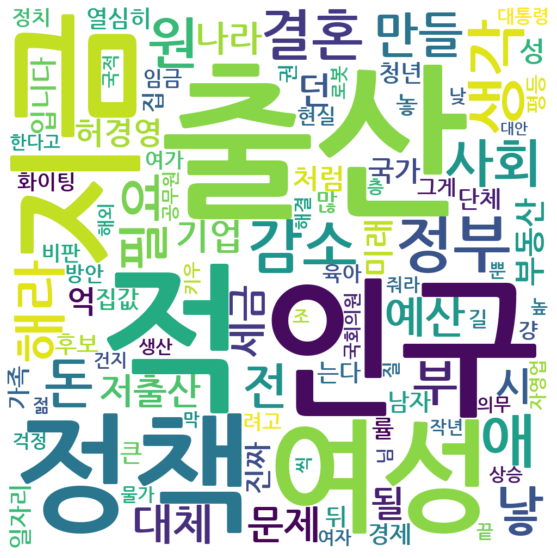

In [ ]:
wordcloud = WordCloud()

font = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'

wc = WordCloud(font_path=font,\
		background_color="white", \
		width=1000, \
		height=1000, \
		max_words=100, \
		max_font_size=300
    )
wc = wc.generate_from_frequencies(word_total)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

#plt.show()

plt.savefig(f'/content/{query}.png')


In [ ]:
total_data.to_csv(f'/content/{query}.csv',encoding='utf-8')

In [ ]:
import pandas as pd
policy1 = pd.read_csv('/content/ÏòÅÏïÑÏàòÎãπ ÏßÄÍ∏â.csv')
policy2 = pd.read_csv('/content/Î∂ÄÎ∂ÄÏú°ÏïÑ Ìú¥ÏßÅ ÌôúÏÑ±Ìôî.csv')
policy3 = pd.read_csv('/content/Îã§ÏûêÎÖÄ ÏßÄÏõê ÌôïÎåÄ.csv')
policy4 = pd.read_csv('/content/Í≥µÎ≥¥Ïú° ÌôïÏ∂©.csv')

In [ ]:
policy1['policy'] = 'ÏòÅÏïÑÏàòÎãπ ÏßÄÍ∏â'
policy2['policy'] = 'Î∂ÄÎ∂ÄÏú°ÏïÑ Ìú¥ÏßÅ ÌôúÏÑ±Ìôî'
policy3['policy'] = 'Îã§ÏûêÎÖÄ ÏßÄÏõê ÌôïÎåÄ'
policy4['policy'] = 'Í≥µÎ≥¥Ïú° ÌôïÏ∂©'

In [ ]:
policy = pd.concat([policy1,policy2])
policy

Unnamed: 0                                              reply  \
0              0  Î¨¥Ïä® Ï§ëÎ≥µÏù¥Ïöî Í∑∏Îüº Ìú¥ÏßÅÍ∏âÏó¨ Í∑∏Í±∞ ÌïòÎÇò Î∞õÍ≥† ÌÇ§Ïö∞ÎùºÎäîÍ±¥Îîî Îã§ Ïùº Í∑∏ÎßåÎëêÎùºÎäîÍ±∞ÏóêÏöî  ...   
1              1                            ÏôÄ ÎÖÑ Ï£ºÎäîÍ±∞ÎèÑ Í±¥ÎìúÎ¶¨ÎÑ§ ÎçîÏ§ÑÏÉùÍ∞ÅÏùÄ Î™ªÌïòÍ≥†   
2              2                           Î¨¥Ïä® Ï§ëÎ≥µÏù∏ÏßÄ Í∑∏Îüº Îã§ Í≤ΩÎ†•Îã®Ï†àÎêòÏñ¥ÏïºÌïòÎäîÍ±¥Í∞Ä   
3              3  ÏÑ∏Í∏à ÎÇ¥Í≥† ÏùºÌïòÎäî ÏõåÌÇπÎßòÏù¥ Ï£ÑÏù∏Ïù∏Í∞Ä Î∂ÄÎ™®Í∏âÏó¨ Ï§Ñ Í≤ÉÏ≤òÎüº Ïñ∏ÌîåÌï¥ÏÑú ÏõêÎûò ÏßÄÏûêÏ≤¥ÏóêÏÑú Ïûê...   
4              4                                      Í∏∞ÏÇ¨ÎÜà ÏÇ¨ÌöåÏÑ± ÏóÜÎäîÍ±∞Í∞ôÏùå   
...          ...                                                ...   
1927        2414                             Ïñ¥ ÏûêÍ∏∞Ïïº  ÏûêÍ∏∞Í∞Ä Î©çÏ∂©Ïù¥ÎùºÏÑú Ïù¥Ìï¥ Î™ªÌï¥   
1928        2415                  ÌéòÎØ∏ Ïù¥Ïû¨Î™Ö ÎåÄÌÜµÎ†πÎêòÎ©¥ ÎåÄÌïúÎØºÍµ≠ÏùÄ ÏßÑÏßú ÌéòÎØ∏ÎïåÎ¨∏Ïóê Îçî ÎßùÌïúÎã§   
1929        2416                Î¶¨Ï£ÑÎ™ÖÏùÄ  ÏπòÎßàÎëêÎ•∏ Ïó¨ÏûêÎ•º Ï°∞ÏïÑÌïòÎäîÎîîÏùºÎ∞òÏó¨ÏÑ±ÏùÄ Î¶¨Ï£ÑÎ™ÖÏùÑ ÏãúÎü¨ÌïòÏßÄ   
1930        2417                                   Íµ≠Í∞ÄÎ•º ÏÑ±ÎÇ®ÏãúÏ≤òÎüºÏö¥ÏòÅÌïòÎ†§Í≥†ÌïòÎÇò   
1931        2418                ÌòïÏàòÌïúÌÖå ÏöïÌïòÎäîÍ±∞ Îì§Ïñ¥Î¥êÎùº    Î∞ëÎ∞îÎã•Ïù∏ÏÉùÎèÑ  Í∑∏Î†áÍ≤å  ÏöïÏïàÌïúÎã§   

                                              tokenized       policy  
0     ['Ï§ëÎ≥µ', 'Ïöî', 'Ìú¥ÏßÅÍ∏â', 'Í∑∏Í±∞', 'ÌÇ§Ïö∞', 'Í±¥Îîî', 'Í∑∏ÎßåÎëê', 'Ïóê...      ÏòÅÏïÑÏàòÎãπ ÏßÄÍ∏â  
1                                         ['Í±¥ÎìúÎ¶¨', 'ÏÉùÍ∞Å']      ÏòÅÏïÑÏàòÎãπ ÏßÄÍ∏â  
2                  ['Ï§ëÎ≥µ', 'Ïù∏ÏßÄ', 'Í≤ΩÎ†•', 'Îã®Ï†à', 'Ïñ¥Ïïº', 'Í±¥Í∞Ä']      ÏòÅÏïÑÏàòÎãπ ÏßÄÍ∏â  
3     ['ÏÑ∏Í∏à', 'ÏõåÌÇπ', 'Îßò', 'Ï£ÑÏù∏', 'Ïù∏Í∞Ä', 'Î∂ÄÎ™®', 'Í∏âÏó¨', 'Ï≤òÎüº'...      ÏòÅÏïÑÏàòÎãπ ÏßÄÍ∏â  
4                                     ['Í∏∞ÏÇ¨', 'ÏÇ¨Ìöå', 'ÏÑ±']      ÏòÅÏïÑÏàòÎãπ ÏßÄÍ∏â  
...                                                 ...          ...  
1927                            ['Î©ç', 'Ï∂©Ïù¥', 'ÎùºÏÑú', 'Ïù¥Ìï¥']  Î∂ÄÎ∂ÄÏú°ÏïÑ Ìú¥ÏßÅ ÌôúÏÑ±Ìôî  
1928    ['ÌéòÎØ∏', 'Ïù¥Ïû¨Î™Ö', 'ÎåÄÌÜµÎ†π', 'ÎåÄÌïúÎØºÍµ≠', 'ÏßÑÏßú', 'ÌéòÎØ∏', 'ÎßùÌïúÎã§']  Î∂ÄÎ∂ÄÏú°ÏïÑ Ìú¥ÏßÅ ÌôúÏÑ±Ìôî  
1929  ['Î¶¨', 'Ï£ÑÎ™Ö', 'ÏπòÎßà', 'ÎëêÎ•∏', 'Ïó¨Ïûê', 'Ï°∞ÏïÑ', 'ÎäîÎîî', 'ÏùºÎ∞ò'...  Î∂ÄÎ∂ÄÏú°ÏïÑ Ìú¥ÏßÅ ÌôúÏÑ±Ìôî  
1930                    ['Íµ≠Í∞Ä', 'ÏÑ±ÎÇ®Ïãú', 'Ï≤òÎüº', 'Ïö¥ÏòÅ', 'Î†§Í≥†']  Î∂ÄÎ∂ÄÏú°ÏïÑ Ìú¥ÏßÅ ÌôúÏÑ±Ìôî  
1931                ['ÌòïÏàò', 'Ïöï', 'Î∞ëÎ∞îÎã•', 'Ïù∏ÏÉù', 'Í∑∏Î†á', 'Ïöï']  Î∂ÄÎ∂ÄÏú°ÏïÑ Ìú¥ÏßÅ ÌôúÏÑ±Ìôî  

[4010 rows x 4 columns]

In [ ]:
policy = pd.concat([policy,policy4])
policy

Unnamed: 0                                              reply  \
0            0  Î¨¥Ïä® Ï§ëÎ≥µÏù¥Ïöî Í∑∏Îüº Ìú¥ÏßÅÍ∏âÏó¨ Í∑∏Í±∞ ÌïòÎÇò Î∞õÍ≥† ÌÇ§Ïö∞ÎùºÎäîÍ±¥Îîî Îã§ Ïùº Í∑∏ÎßåÎëêÎùºÎäîÍ±∞ÏóêÏöî  ...   
1            1                            ÏôÄ ÎÖÑ Ï£ºÎäîÍ±∞ÎèÑ Í±¥ÎìúÎ¶¨ÎÑ§ ÎçîÏ§ÑÏÉùÍ∞ÅÏùÄ Î™ªÌïòÍ≥†   
2            2                           Î¨¥Ïä® Ï§ëÎ≥µÏù∏ÏßÄ Í∑∏Îüº Îã§ Í≤ΩÎ†•Îã®Ï†àÎêòÏñ¥ÏïºÌïòÎäîÍ±¥Í∞Ä   
3            3  ÏÑ∏Í∏à ÎÇ¥Í≥† ÏùºÌïòÎäî ÏõåÌÇπÎßòÏù¥ Ï£ÑÏù∏Ïù∏Í∞Ä Î∂ÄÎ™®Í∏âÏó¨ Ï§Ñ Í≤ÉÏ≤òÎüº Ïñ∏ÌîåÌï¥ÏÑú ÏõêÎûò ÏßÄÏûêÏ≤¥ÏóêÏÑú Ïûê...   
4            4                                      Í∏∞ÏÇ¨ÎÜà ÏÇ¨ÌöåÏÑ± ÏóÜÎäîÍ±∞Í∞ôÏùå   
..         ...                                                ...   
70          93  Ï†ïÎÖÑ ÎäòÎ¶¨Îäî Ïàò Î∞ñÏóê ÏóÜÏßÄ ÏßÄÍ∏à ÌÉúÏñ¥ÎÇú Ïï†Îì§Ïù¥ ÏÑ±Ïù∏ÎêòÎäî ÎÇòÏù¥ Ï¶àÏùå ÎêòÎ©¥ Ï†ïÎÖÑ ÎäòÎ†§ÎèÑ...   
71          94  Ïù∏Íµ¨Í∞êÏÜåÍ∞Ä Í≤ΩÏ†úÏóî Î∂àÏù¥ÏùµÏùºÏàò ÏûàÏúºÎÇò ÌôòÍ≤ΩÎ¨∏Ï†ú ÏÇ¨ÌöåÎ¨∏Ï†úÏóî ÏàúÏûëÏö©Ïù¥Îã§ Ïù∏Íµ¨Í∞êÏÜå Ï†ÄÏ∂úÏÇ∞ ...   
72          95                                            ÌóàÍ≤ΩÏòÅ ÎΩëÏïÑ„Öé   
73          96                                      ÏûêÍ∏∞Îì§ÎÅºÎ¶¨ ÏûêÌôîÏûêÏ∞¨ÌïòÎäîÍµ∞   
74          97              ÏïûÏúºÎ°ú ÎçîÎßéÏùÄ ÌôïÏ∂©Ïù¥ ÌïÑÏöîÌïòÏ£†  ÏãúÎØºÎì§Ïùò Í≥ÑÏÜçÏ†ÅÏù∏ Í¥ÄÏã¨Ïù¥ ÌïÑÏöîÌï©ÎãàÎã§   

                                            tokenized   policy  
0   ['Ï§ëÎ≥µ', 'Ïöî', 'Ìú¥ÏßÅÍ∏â', 'Í∑∏Í±∞', 'ÌÇ§Ïö∞', 'Í±¥Îîî', 'Í∑∏ÎßåÎëê', 'Ïóê...  ÏòÅÏïÑÏàòÎãπ ÏßÄÍ∏â  
1                                       ['Í±¥ÎìúÎ¶¨', 'ÏÉùÍ∞Å']  ÏòÅÏïÑÏàòÎãπ ÏßÄÍ∏â  
2                ['Ï§ëÎ≥µ', 'Ïù∏ÏßÄ', 'Í≤ΩÎ†•', 'Îã®Ï†à', 'Ïñ¥Ïïº', 'Í±¥Í∞Ä']  ÏòÅÏïÑÏàòÎãπ ÏßÄÍ∏â  
3   ['ÏÑ∏Í∏à', 'ÏõåÌÇπ', 'Îßò', 'Ï£ÑÏù∏', 'Ïù∏Í∞Ä', 'Î∂ÄÎ™®', 'Í∏âÏó¨', 'Ï≤òÎüº'...  ÏòÅÏïÑÏàòÎãπ ÏßÄÍ∏â  
4                                   ['Í∏∞ÏÇ¨', 'ÏÇ¨Ìöå', 'ÏÑ±']  ÏòÅÏïÑÏàòÎãπ ÏßÄÍ∏â  
..                                                ...      ...  
70  ['Ï†ïÎÖÑ', 'ÎäòÎ¶¨', 'Î∞ñ', 'ÏßÄÍ∏à', 'ÌÉúÏñ¥ÎÇú', 'Ïï†', 'ÏÑ±Ïù∏', 'ÎÇòÏù¥'...   Í≥µÎ≥¥Ïú° ÌôïÏ∂©  
71  ['Ïù∏Íµ¨', 'Í∞êÏÜå', 'Í≤ΩÏ†ú', 'Ïóî', 'Î∂àÏù¥Ïùµ', 'ÏúºÎÇò', 'ÌôòÍ≤Ω', 'Î¨∏Ï†ú...   Í≥µÎ≥¥Ïú° ÌôïÏ∂©  
72                                       ['ÌóàÍ≤ΩÏòÅ', '„Öé']   Í≥µÎ≥¥Ïú° ÌôïÏ∂©  
73                               ['ÎÅºÎ¶¨', 'ÏûêÌôîÏûêÏ∞¨', 'ÎäîÍµ∞']   Í≥µÎ≥¥Ïú° ÌôïÏ∂©  
74  ['Îßé', 'ÌôïÏ∂©', 'ÌïÑÏöî', 'Ï£†', 'ÏãúÎØº', 'Í≥ÑÏÜç', 'Ï†Å', 'Í¥ÄÏã¨', ...   Í≥µÎ≥¥Ïú° ÌôïÏ∂©  

[4567 rows x 4 columns]

In [ ]:
policy.to_csv('/content/Ï†ÄÏ∂úÏÇ∞ Ï†ïÏ±Ö Í∏∞ÏÇ¨_ÎåìÍ∏Ä Î™®Ïùå.csv')